**1D Simple Harmonic Oscillator System**

$U(x) =\frac{1}{2}kx^{2}$

$T(p) = \frac{p^{2}}{2m}$

$H = U(x) + T(p)$

$F = -\frac{dU(x)}{dx} = -kx$

**Functions to be written:**

* calculateForce
* Initialization of position s and velocities
* VelocityUpdate(step)
* PositionUpdate(step)
* TotalEnergy
* KineticEnergy
* potentialEnergy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def calc_force(x, k):
    return -k*x

def calc_potential(x, k):
    return 0.5*k*x**2

def calc_kinetic(v, mass):
    return 0.5*mass*v**2

def update_velocities(v, f, mass, dt, stepFraction=1.0):
    return v + stepFraction*dt*f/(mass)

def update_positions(x, v, dt, stepFraction=1.0):
    return x + stepFraction*dt*v

In [49]:
#
# Velocity Verlet Integrator
#

def VelocityVerlet(x,v, MDSteps=100, dt=0.01, mass=1.0, k=100):
    xtrj = [x]
    vtrj = [v]
    for step in range(MDSteps):
        f = calc_force(x, k)
        v = update_velocities(v, f, mass, dt, stepFraction=0.5)
        x = update_positions(x, v, dt, stepFraction=1.0)
        f = calc_force(x, k)
        v = update_velocities(v, f, mass, dt, stepFraction=0.5)
        xtrj.append(x)
        vtrj.append(v)

    xtrj = np.array(xtrj)
    vtrj = np.array(vtrj)
    Ek = calc_kinetic(vtrj, mass)
    Ep = calc_potential(xtrj, k)
    Et = Ek+Ep
    return xtrj, vtrj

#
# Euler Integrator
#

def Euler(x,v, MDSteps=100, dt=0.01, mass=1.0, k=100):
    xtrj = [x]
    vtrj = [v]
    for step in range(MDSteps):
        f = calc_force(x, k)
        x = x + v*dt
        v = v + dt*f/mass
        xtrj.append(x)
        vtrj.append(v)

    xtrj = np.array(xtrj)
    vtrj = np.array(vtrj)
    Ek = calc_kinetic(vtrj, mass)
    Ep = calc_potential(xtrj, k)
    Et = Ek+Ep
    return xtrj, vtrj

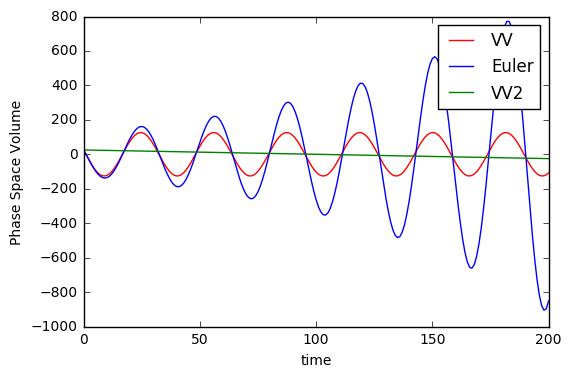

In [87]:

#
# Phase space area
#

dx = 5
dv = 5

x4,v4 = VelocityVerlet(0,2, MDSteps=200, dt=0.0001)
x5,v5 = VelocityVerlet(0+dx,2+dv, MDSteps=200, dt=0.0001)

x,v = VelocityVerlet(0,2, MDSteps=200, dt=0.01)
x1,v1 = VelocityVerlet(0+dx,2+dv, MDSteps=200, dt=0.01)

x2,v2 = Euler(0,2, MDSteps=200, dt=0.01)
x3,v3 = Euler(0+dx,2+dv, MDSteps=200, dt=0.01)

plt.plot((x1-x)*(v1-v), 'r', label='VV')
plt.plot((x3-x2)*(v3-v2), 'b', label='Euler')
plt.plot((x5-x4)*(v5-v4), 'g', label='VV2')
plt.xlabel('time')
plt.ylabel('Phase Space Volume')
plt.legend()